<a href="https://colab.research.google.com/github/DininduChamikara/Research_NLP/blob/main/Sinhala_NER_1_Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json

In [2]:
with open('/content/drive/MyDrive/Research Project/annotations_v1.0.json', 'r') as f:
  data = json.load(f)

In [7]:
data['classes']

['LOCATION', 'PERSON', 'ORGANIZATION', 'DATE', 'TIME']

In [10]:
data['annotations'][0][0]

'ආසියානු ක්\u200dරිකට් ශුර ශ්\u200dරී ලංකා කණ්ඩායම සහ සත්කාරක ඉන්දීය කණ්ඩායම අතර 20/20 ක්\u200dරිකට් තරගාවලියේ 3 වැනි සහ අවසන් 20/20 ක්\u200dරිකට් තරගය ලකුණු 91කින් ජයගනිමින් ඉන්දියාව තරගාවලියේ ජය හිමි කර ගනු ලැබීය.\r'

In [11]:
data['annotations'][0][1]

{'entities': [[0, 7, 'LOCATION'],
  [21, 31, 'LOCATION'],
  [51, 57, 'LOCATION'],
  [154, 162, 'LOCATION']]}

In [12]:
data['annotations'][0][1]['entities']

[[0, 7, 'LOCATION'],
 [21, 31, 'LOCATION'],
 [51, 57, 'LOCATION'],
 [154, 162, 'LOCATION']]

In [15]:
data['annotations'][0][0][0:7]

'ආසියානු'

In [30]:
import spacy

from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank('si') # load a new spacy model
doc_bin = DocBin()

<ipython-input-31-493ef8f7c5eb>:4: TqdmExperimentalWarning: GUI is experimental/alpha
  for training_example in tqdm(data['annotations']):


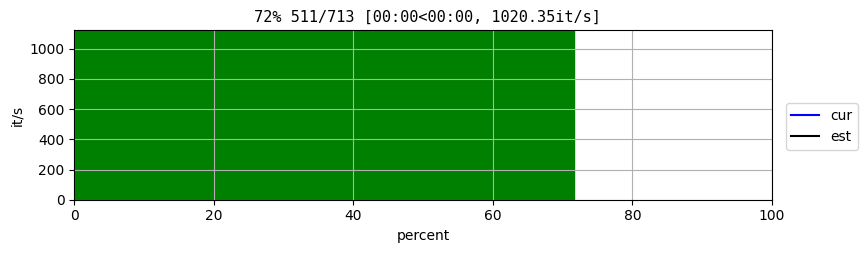

In [31]:
from tqdm.gui import tqdm
from spacy.util import filter_spans

for training_example in tqdm(data['annotations']):
  text = training_example[0]
  labels = training_example[1]['entities']
  doc = nlp.make_doc(text)
  ents = []
  for start, end, label in labels:
    span = doc.char_span(start, end, label=label, alignment_mode="contract")
    if span is None:
      print("Skipping entry")
    else:
      ents.append(span)
  filtered_ents = filter_spans(ents)
  doc.ents = filtered_ents
  doc_bin.add(doc)

doc_bin.to_disk("train.spacy")




In [32]:
!python -m spacy init fill-config base_config.cfg config.cfg

2023-09-23 07:23:29.495932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [35]:
!python -m spacy train config.cfg --output ./ --paths.train ./train.spacy --paths.dev ./train.spacy

2023-09-23 07:54:27.989539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     56.45    0.44    0.42    0.46    0.00
  0     200        108.72   2044.60   38.57   43.65   34.55    0.39
  1     400         75.60   1526.95   46.07   47.92   44.35    0.46
  2     600         93.15   1281.07   74.69   76.51   72.96    0.75
  3     800        246.57   1201.86   83.82   85.83   81.91    0.84
  5    1000         79.37    940.07   86.86   87.38   86.35    0.87
  7    1200        304.83    797.19   91.58   92

In [36]:
nlp_ner = spacy.load("model-best")

In [ ]:
from spacy import displacy

In [39]:
doc = nlp_ner("කර්ණාටක ප්‍රාන්තයේ අනපේක්ෂිත මැතිවරණ ප්‍රතිපලයෙන් පසු ඉන්දීය ජාතික කොන්ග්‍රසය නැවතත් ජයග්‍රාහි මාවතකට අවතීර්ණ වෙමින් සිටිනවා.")
doc2 = nlp_ner("පසුගිය සතියේ නිමාවට පත් වුණු ශ්‍රී ලංකා-අයර්ලන්ත දෙවන ටෙස්ට් තරගයේ දී වාර්තා කිහිපයක් අලුත් වුණා. ඒ අතුරින් කාගේත් අවධානය දිනා ගත්තේ ප්‍රභාත් ජයසූරිය බිහි කළ ලෝක වාර්තාව යි. එහි දී ඔහු අඩුම ටෙස්ට් තරග ප්‍රමාණයකින් කඩුලු 50 කඩඉම වෙත පැමිණි දඟපන්දු යවන්නා ලෙස වාර්තා අතරට එකතු වුණා.")

colors = {"LOCATION": "#F67DE3", "PERSON": "#7DF609", "ORGANIZATION": "#A6E22D", "DATE": "#FFFF00", "TIME": "#800000"}
options = {"colors": colors}

spacy.displacy.render(doc, style="ent", options= options, jupyter=True)
spacy.displacy.render(doc2, style="ent", options= options, jupyter=True)